In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv('../data/cleaned_superstore.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   row_id              9994 non-null   int64  
 1   order_id            9994 non-null   object 
 2   order_date          9994 non-null   object 
 3   ship_date           9994 non-null   object 
 4   ship_mode           9994 non-null   object 
 5   customer_id         9994 non-null   object 
 6   customer_name       9994 non-null   object 
 7   segment             9994 non-null   object 
 8   country             9994 non-null   object 
 9   city                9994 non-null   object 
 10  state               9994 non-null   object 
 11  region              9994 non-null   object 
 12  product_id          9994 non-null   object 
 13  category            9994 non-null   object 
 14  sub-category        9994 non-null   object 
 15  product_name        9994 non-null   object 
 16  sales 

In [3]:
df['order_date'] = pd.to_datetime(df['order_date'])

df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,category,sub-category,product_name,sales,quantity,discount,profit,year,sales_per_quantity,month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,130.9800,11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,243.9800,11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,7.3100,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,191.5155,10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,11.1840,10


In [4]:
df.select_dtypes(include='object').columns

Index(['order_id', 'ship_date', 'ship_mode', 'customer_id', 'customer_name',
       'segment', 'country', 'city', 'state', 'region', 'product_id',
       'category', 'sub-category', 'product_name'],
      dtype='object')

In [7]:
df.select_dtypes(include=['int64','float64']).columns

Index(['row_id', 'sales', 'quantity', 'discount', 'profit', 'year',
       'sales_per_quantity', 'month'],
      dtype='object')

In [10]:
sales_trend=df.groupby('order_date')['sales'].sum().reset_index()

In [11]:
sales_trend

,order_date,sales
0,2014-01-03,16.4480
1,2014-01-04,288.0600
2,2014-01-05,19.5360
3,2014-01-06,4407.1000
4,2014-01-07,87.1580
...,...,...
1232,2017-12-26,814.5940
1233,2017-12-27,177.6360
1234,2017-12-28,1657.3508
1235,2017-12-29,2915.5340


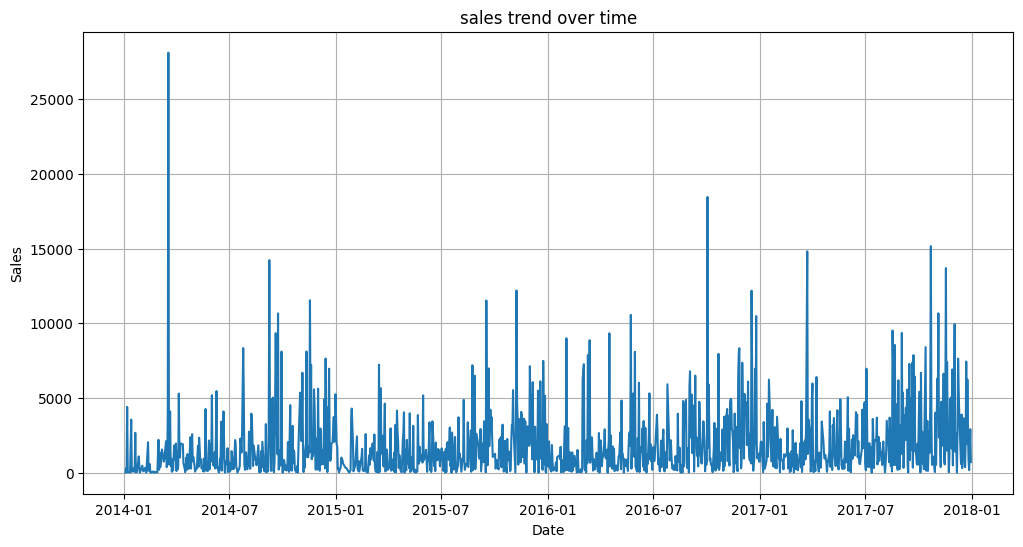

In [12]:
plt.figure(figsize=(12,6))
plt.plot(sales_trend['order_date'],sales_trend['sales'])
plt.title("sales trend over time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

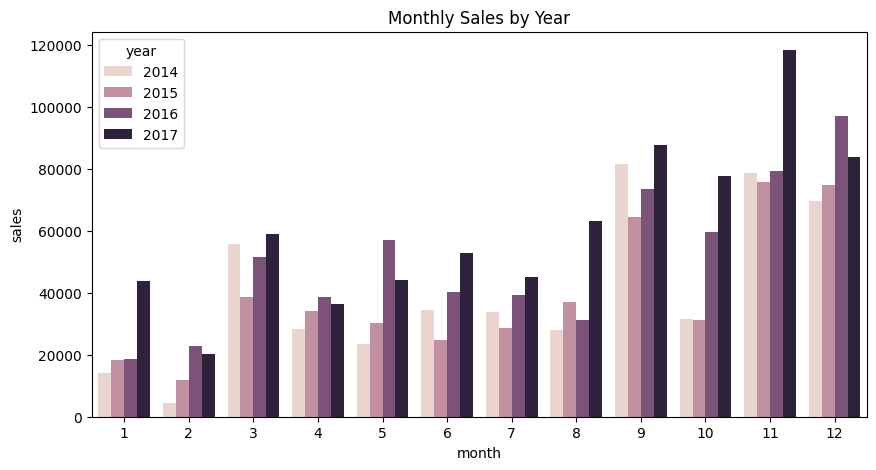

In [14]:
monthly_sales = df.groupby(['year','month'])['sales'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=monthly_sales, x='month', y='sales', hue='year')
plt.title("Monthly Sales by Year")
plt.show()


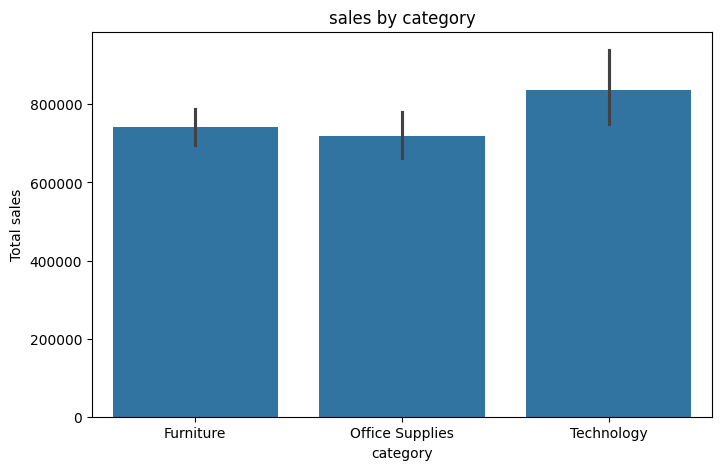

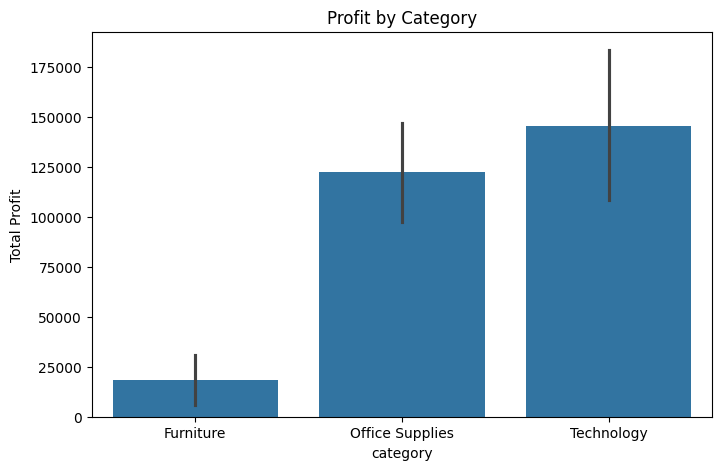

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='category',y='sales',estimator=sum)
plt.title("sales by category")
plt.ylabel("Total sales")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(data=df, x='category', y='profit', estimator=sum)
plt.title("Profit by Category")
plt.ylabel("Total Profit")
plt.show()


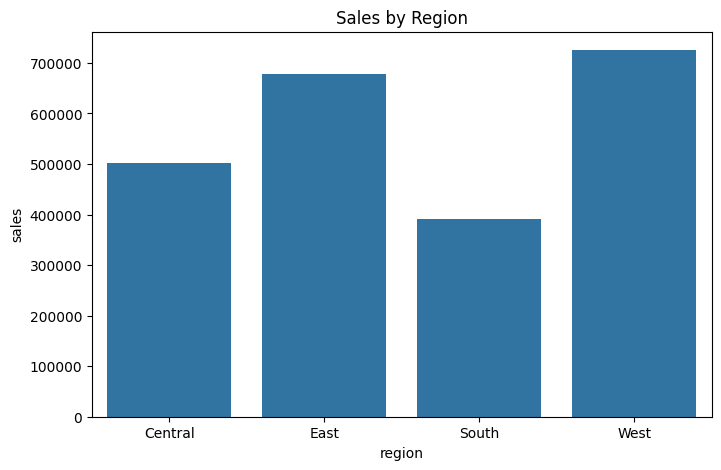

In [18]:
region_sales=df.groupby('region')['sales'].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=region_sales,x='region',y='sales',)
plt.title("Sales by Region")
plt.show()

<Axes: xlabel='region', ylabel='sales'>

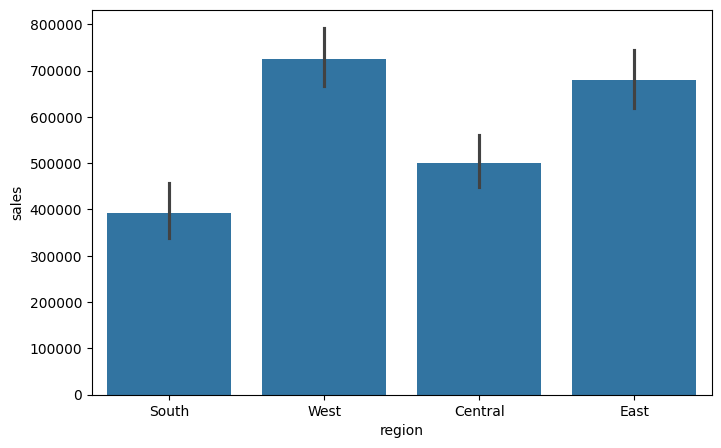

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='region',y='sales',estimator=sum)

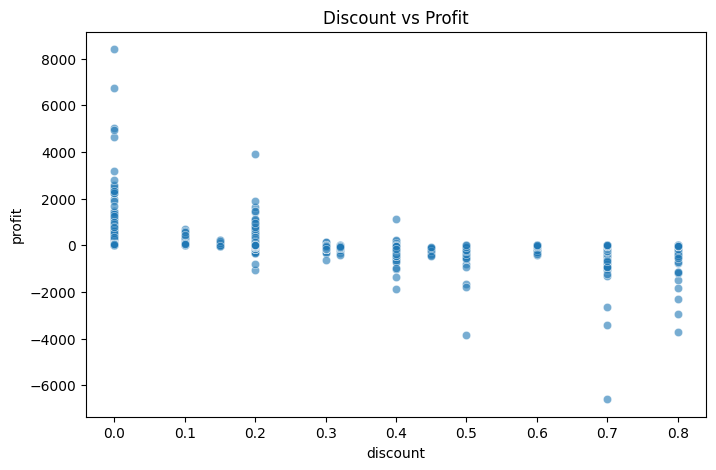

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='discount', y='profit', alpha=0.6)
plt.title("Discount vs Profit")
plt.show()


In [20]:
df[['discount','profit','sales']].corr()

,discount,profit,sales
discount,1.000000,-0.219487,-0.028190
profit,-0.219487,1.000000,0.479064
sales,-0.028190,0.479064,1.000000


product_name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: sales, dtype: float64


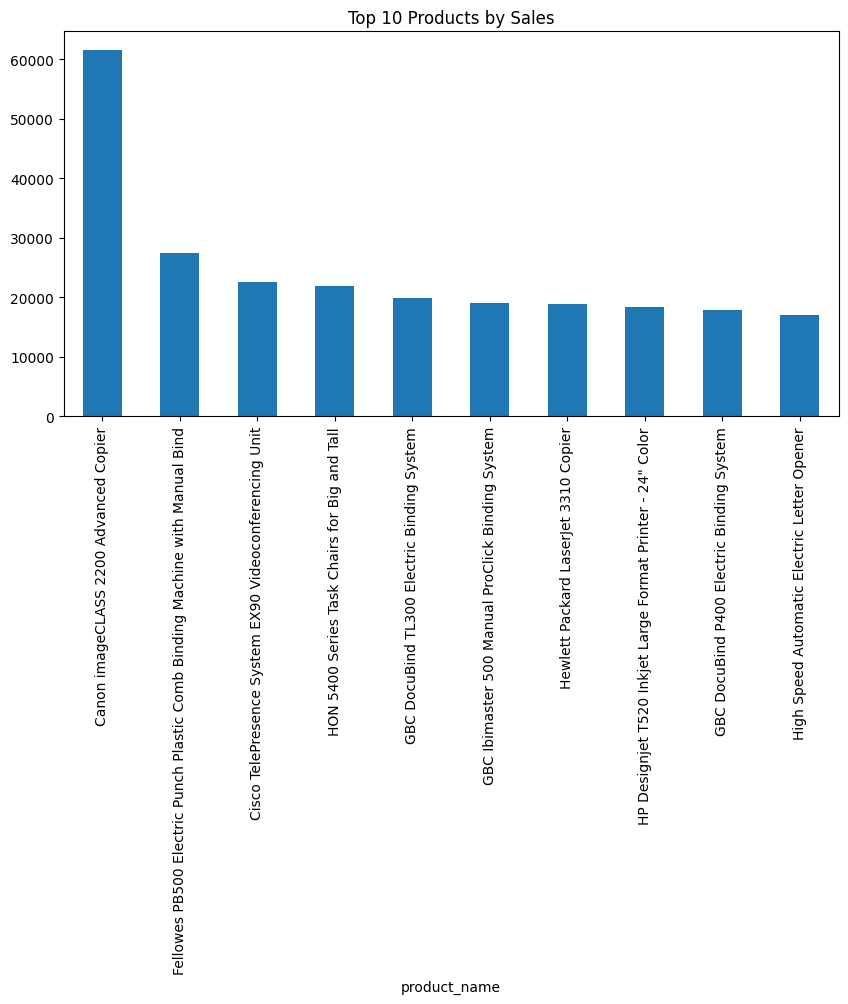

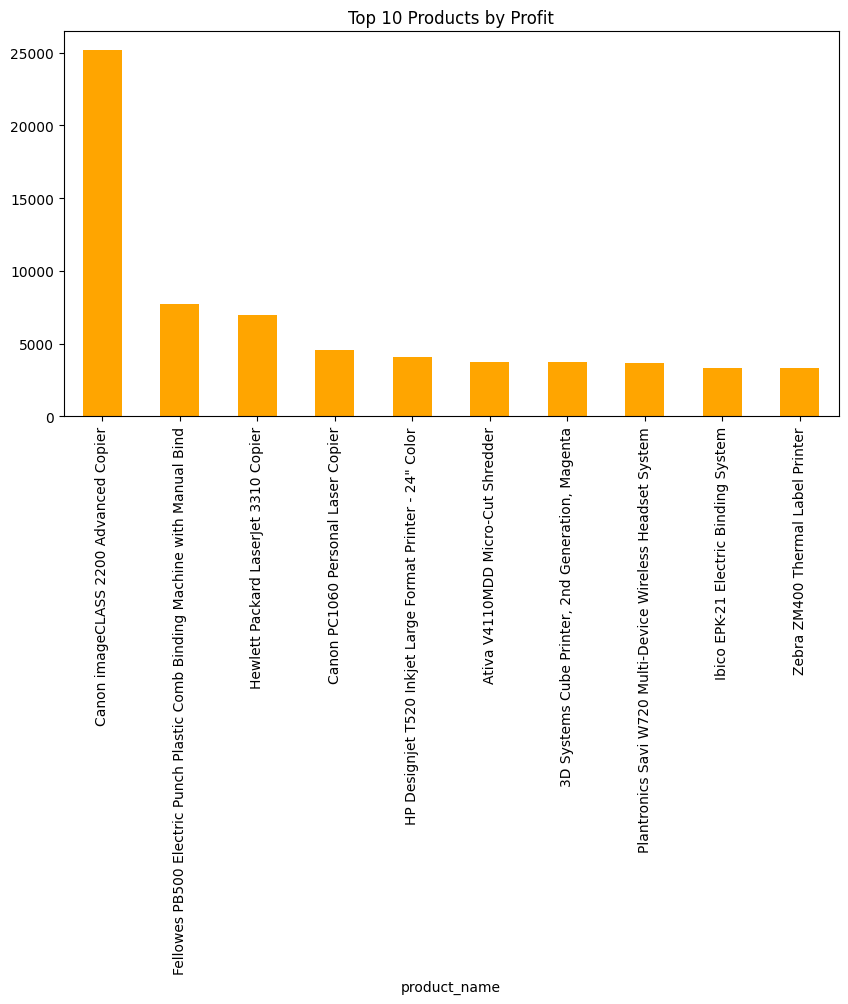

In [23]:
#top 10 products by sales and profit
top_sales=df.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)
top_profit=df.groupby('product_name')['profit'].sum().sort_values(ascending=False).head(10)
print(top_sales)
plt.figure(figsize=(10,5))
top_sales.plot(kind='bar')
plt.title("Top 10 Products by Sales")
plt.show()

plt.figure(figsize=(10,5))
top_profit.plot(kind='bar', color='orange')
plt.title("Top 10 Products by Profit")
plt.show()

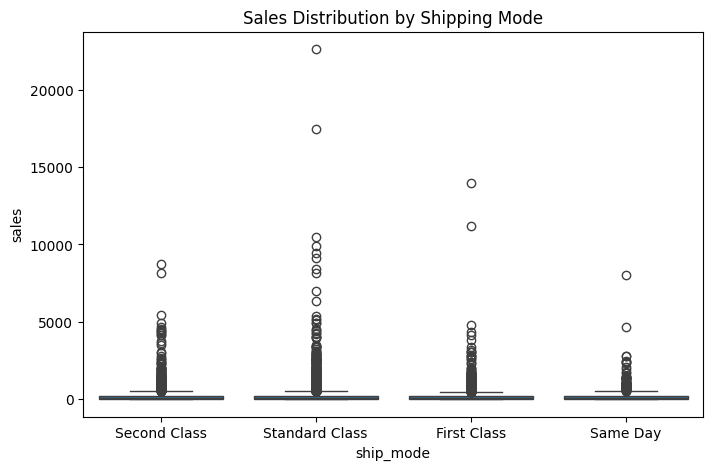

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='ship_mode', y='sales')
plt.title("Sales Distribution by Shipping Mode")
plt.show()


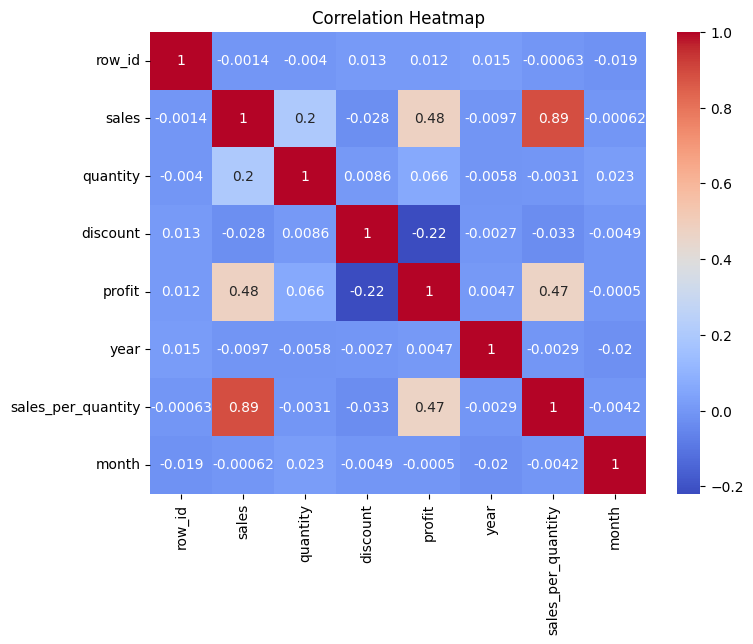

In [27]:

plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


ModuleNotFoundError: No module named 'scripts'

In [5]:
import os
print(os.getcwd())


d:\Retail_Sales_Forecasting\notebooks


ModuleNotFoundError: No module named 'scripts.db_connect'